In [1]:
from OptimalTransportSolvers import OptimalTransportProblem, HungarianSolver, MinCostFlowSolver, MILPSolver
from plotnine import *
from tqdm import tqdm
import pandas as pd

exp=3
n_samples=100
kwargs_source={'loc': 0, 'scale': 1, 'size': 2}
kwargs_destination={'loc': 0, 'scale': 20, 'size': 2}

Below, we generate 1000 instances of a discrete optimal transport problem, where 100 particle origins and 100 destinations are sampled from 2 normal distributions.

We learn here that solving optimal transport problems of the characteristics outlined seems to be manageable with the Hungarian algorithm and the Min-Cost-Flow specific algorithm. However, the mixed-integer-linear solver CBC along with pyomo seem to be rather impractical for bootstrapping the wasserstein metric of two 1-D distributions, as this would require simulating a lot more problem instances and potentially lots more samples per instance as well.

| Algorithm | Execution Time |
| --- | --- |
| Hungarian | 00:09 |
| Min-Cost-Flow OR-tools| 00:25 |
| MLP CBC Relaxation | 13:49 |
| MIP CBC | 17:09 |

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [13:49<00:00,  1.20it/s]


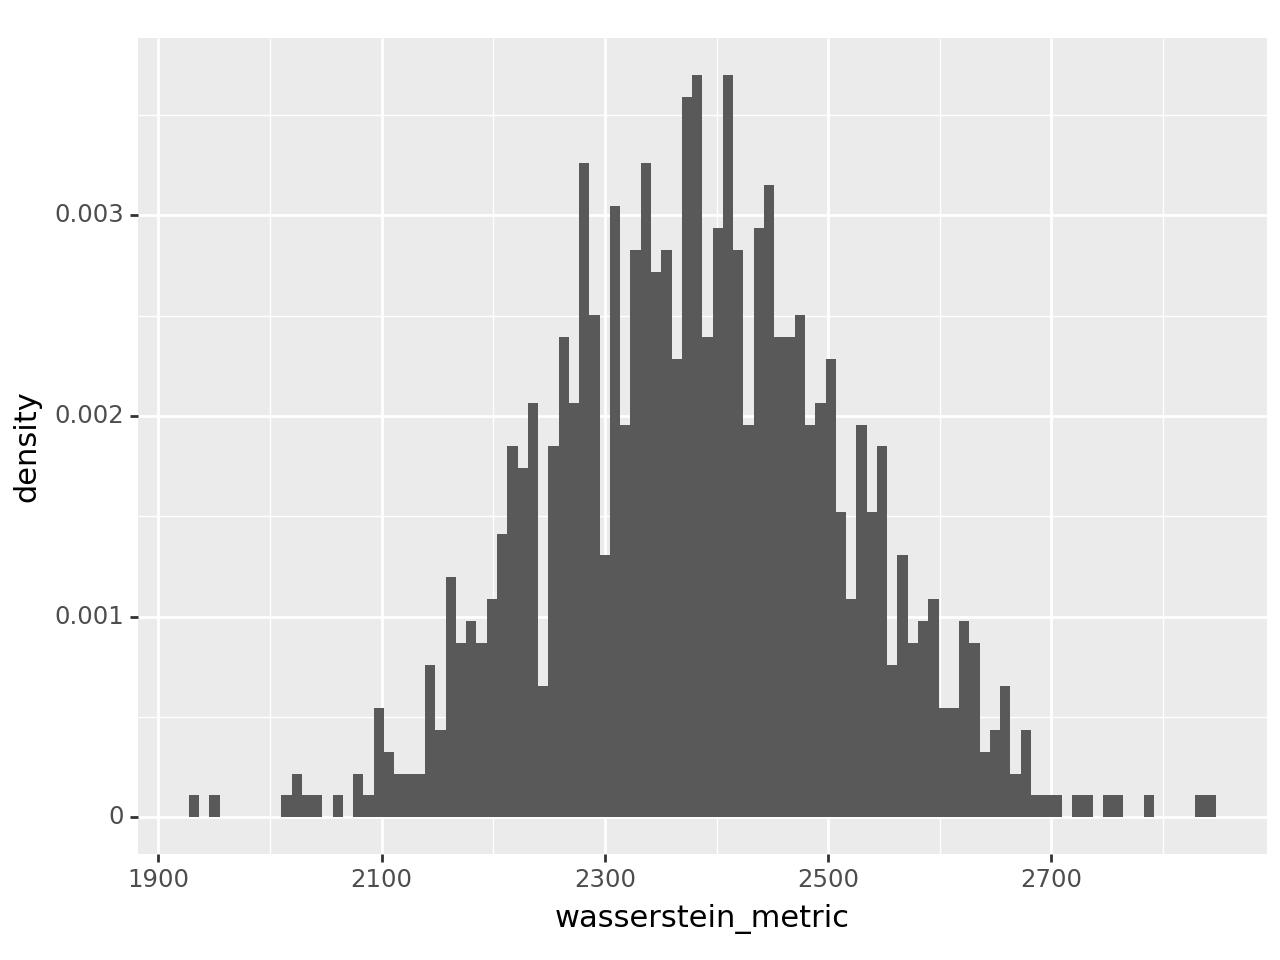

In [2]:
df = pd.DataFrame([{'wasserstein_metric': MILPSolver(kwargs_source, kwargs_destination, n_samples).solve()} for i in tqdm(range(0, 10**exp))])

p = (ggplot(data=df)+
     geom_histogram(aes(x='wasserstein_metric', y=after_stat('density')), bins=100))
print(p)

100%|██████████| 1000/1000 [17:09<00:00,  1.03s/it]


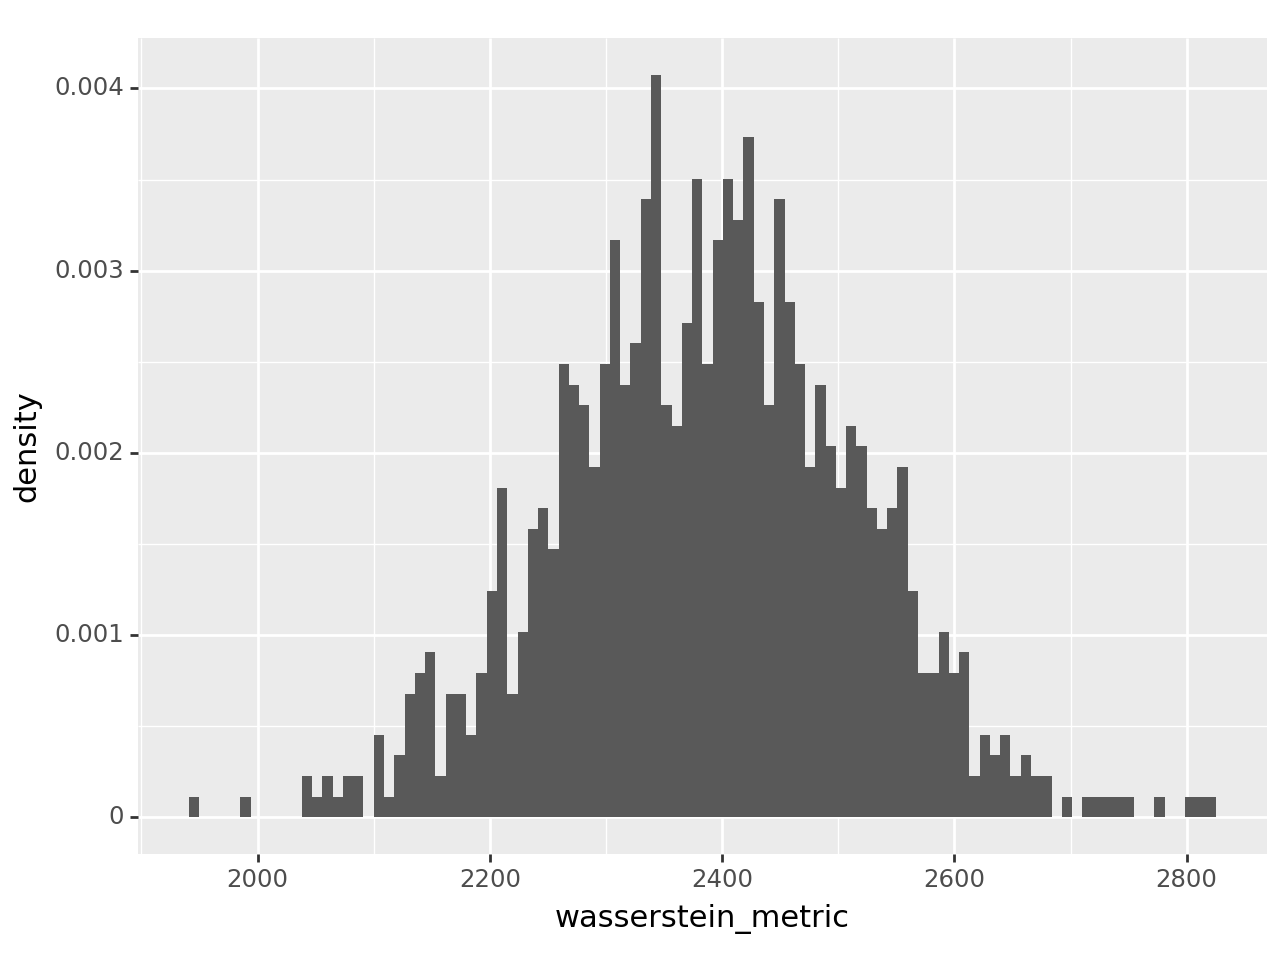

In [3]:
df = pd.DataFrame([{'wasserstein_metric': MILPSolver(kwargs_source, kwargs_destination, n_samples)
                    .solve(decision_variable_type='binary')} for i in tqdm(range(0, 10**exp))])

p = (ggplot(data=df)+
     geom_histogram(aes(x='wasserstein_metric', y=after_stat('density')), bins=100))
print(p)


100%|██████████| 1000/1000 [00:09<00:00, 105.59it/s]


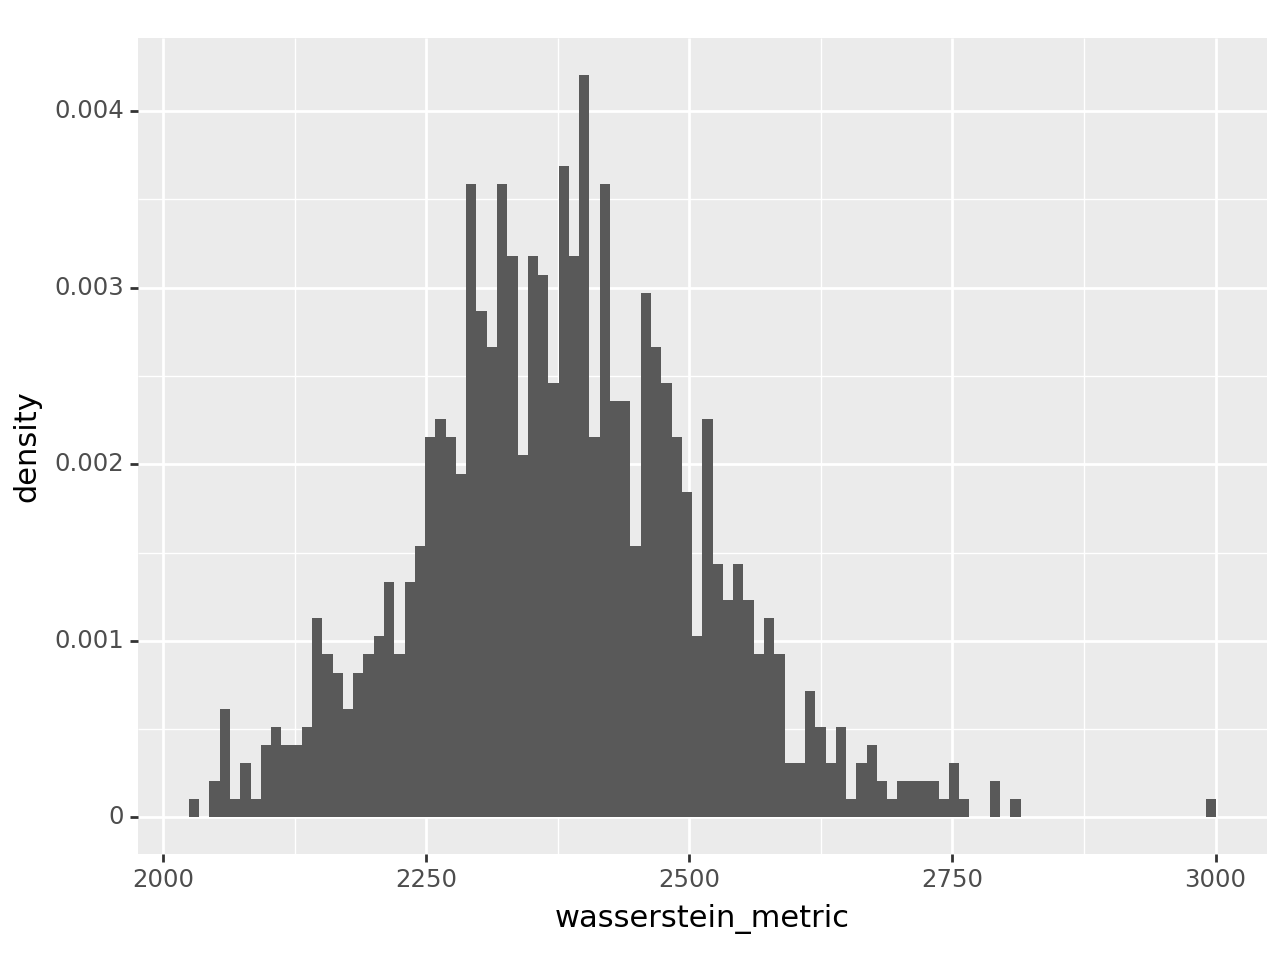

In [4]:
df = pd.DataFrame([{'wasserstein_metric': HungarianSolver(kwargs_source, kwargs_destination, n_samples).solve()} for i in tqdm(range(0, 10**exp))])

p = (ggplot(data=df)+
     geom_histogram(aes(x='wasserstein_metric', y=after_stat('density')), bins=100))
print(p)


100%|██████████| 1000/1000 [00:25<00:00, 39.34it/s]


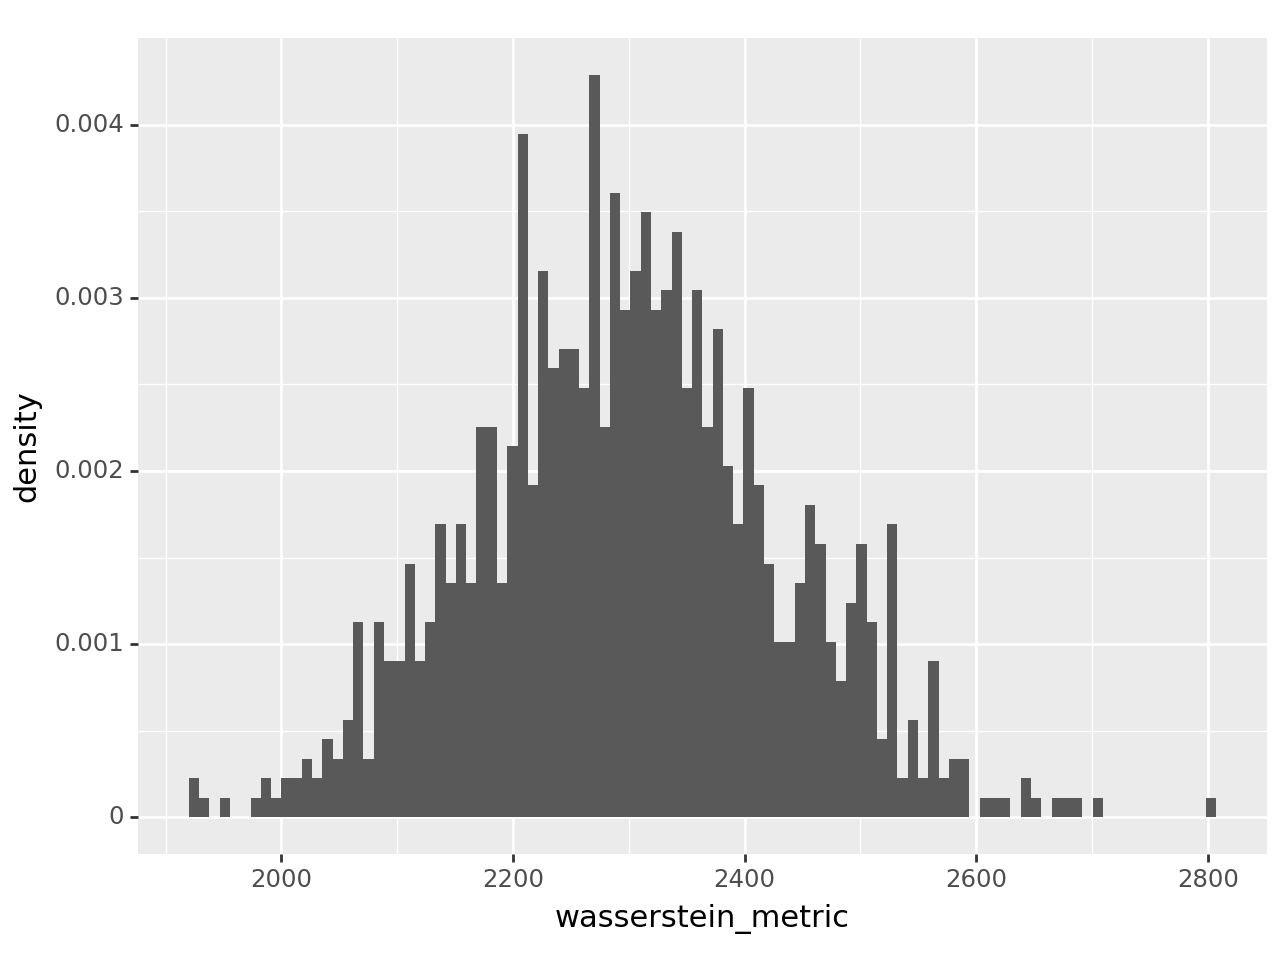

In [5]:
df = pd.DataFrame([{'wasserstein_metric': MinCostFlowSolver(kwargs_source, kwargs_destination, n_samples).solve()} for i in tqdm(range(0, 10**exp))])

p = (ggplot(data=df)+
     geom_histogram(aes(x='wasserstein_metric', y=after_stat('density')), bins=100))
print(p)
2